# 1. Obtain Pokemon images

## 1.1 Obtain the images from Kaggle

In [2]:
!kaggle datasets download -d thedagger/pokemon-generation-one -p data/images

Dataset URL: https://www.kaggle.com/datasets/thedagger/pokemon-generation-one
License(s): GPL-2.0
  0%|▏                                     | 11.0M/2.15G [00:03<08:12, 4.67MB/s]^C
  1%|▏                                     | 12.0M/2.15G [00:03<11:02, 3.47MB/s]
User cancelled operation


In [ ]:
!unzip data/images/pokemon-generation-one.zip -d data/images

## 1.2 Show some images with its label

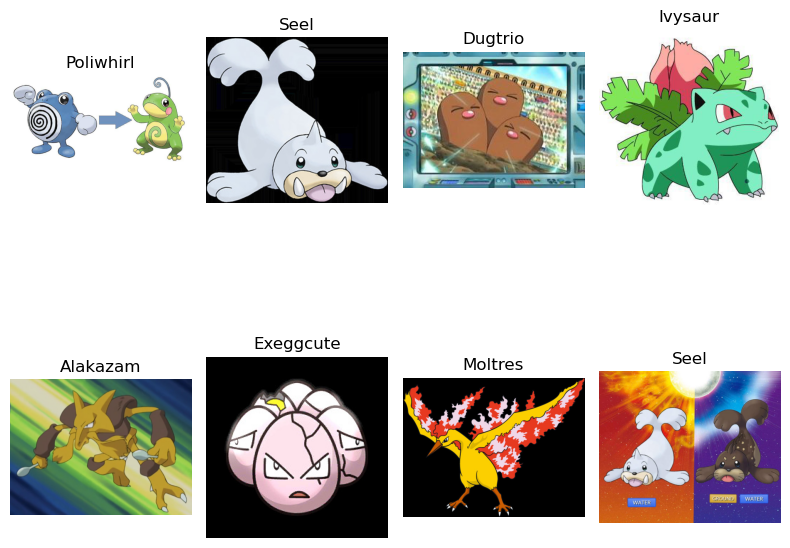

In [3]:
import os
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_folder = 'data/images/dataset'

pokemon_folders = [f for f in os.listdir(image_folder)]

fig, ax = plt.subplots(2, 4, figsize=(8, 8))
ax = ax.flatten()

for i in range(8):
    random_pokemon = random.choice(pokemon_folders)
    pokemon_images = os.listdir(os.path.join(image_folder, random_pokemon))
    random_image = random.choice(pokemon_images)
    image_path = os.path.join(image_folder, random_pokemon, random_image)
    
    img = mpimg.imread(image_path)
    ax[i].imshow(img)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off') 

plt.tight_layout()
plt.show()


## 1.3 See the class distribution

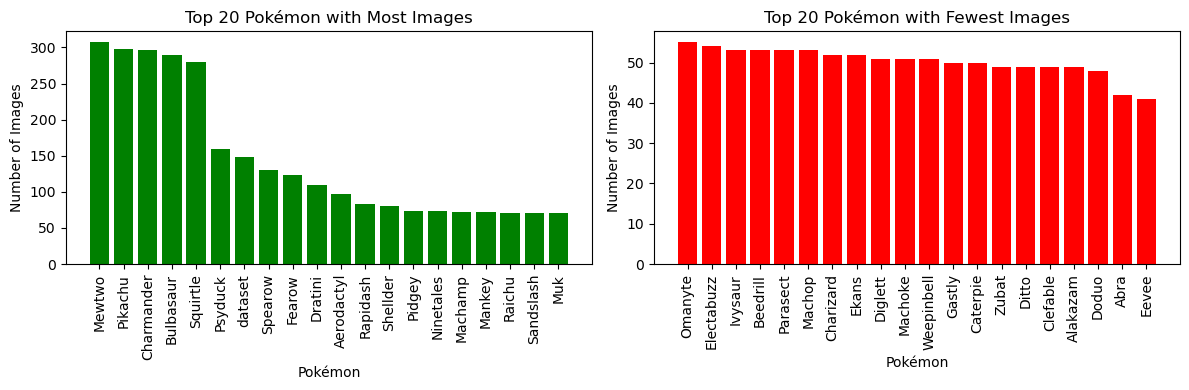

In [4]:
image_counts = {}
for folder in pokemon_folders:
    folder_path = os.path.join(image_folder, folder) # Obtiene la ruta 
    image_files = [f for f in os.listdir(folder_path)]
    image_counts[folder] = len(image_files)

image_counts = dict(sorted(image_counts.items(), key=lambda item: item[1], reverse=True))

top_20_pokemon = list(image_counts.keys())[:20]
top_20_counts = list(image_counts.values())[:20]

bottom_20_pokemon = list(image_counts.keys())[-20:]
bottom_20_counts = list(image_counts.values())[-20:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 

ax1.bar(top_20_pokemon, top_20_counts, color='green')
ax1.set_title('Top 20 Pokémon with Most Images')
ax1.set_xlabel('Pokémon')
ax1.set_ylabel('Number of Images')
ax1.tick_params(axis='x', rotation=90) 

ax2.bar(bottom_20_pokemon, bottom_20_counts, color='red')
ax2.set_title('Top 20 Pokémon with Fewest Images')
ax2.set_xlabel('Pokémon')
ax2.set_ylabel('Number of Images')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()

## 1.4 Divide into train, validation and test

In [9]:
import os
import shutil
import random
from pathlib import Path

original_dir = Path(image_folder)
new_base_dir = original_dir.parent / 'splitted_dataset'

def split_dataset(train_ratio=0.7, val_ratio=0.2):
    os.makedirs(new_base_dir / 'train', exist_ok=True)
    os.makedirs(new_base_dir / 'val', exist_ok=True)
    os.makedirs(new_base_dir / 'test', exist_ok=True)

    for pokemon in os.listdir(original_dir):
        pokemon_path = original_dir / pokemon
        images = os.listdir(pokemon_path)
        random.shuffle(images)

        total_images = len(images)
        train_count = int(total_images * train_ratio)
        val_count = int(total_images * val_ratio)

        os.makedirs(new_base_dir / 'train' / pokemon, exist_ok=True)
        os.makedirs(new_base_dir / 'val' / pokemon, exist_ok=True)
        os.makedirs(new_base_dir / 'test' / pokemon, exist_ok=True)

        for img in images[:train_count]:
            shutil.copyfile(pokemon_path / img, new_base_dir / 'train' / pokemon / img)
        for img in images[train_count:train_count + val_count]:
            shutil.copyfile(pokemon_path / img, new_base_dir / 'val' / pokemon / img)
        for img in images[train_count + val_count:]:
            shutil.copyfile(pokemon_path / img, new_base_dir / 'test' / pokemon / img)

split_dataset()


## 1.5 Load dataset from directory

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dir = new_base_dir / 'train'
val_dir = new_base_dir / 'val'
test_dir = new_base_dir / 'test'

train_dataset = image_dataset_from_directory(train_dir,
                batch_size=32,
                image_size=(180, 180))

val_dataset = image_dataset_from_directory(val_dir,
                batch_size=32,
                image_size=(180, 180))

test_dataset = image_dataset_from_directory(test_dir,
                batch_size=32,
                image_size=(180, 180))

Found 7395 files belonging to 149 classes.
Found 2071 files belonging to 149 classes.
Found 1192 files belonging to 149 classes.


2024-09-21 20:30:30.021976: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
